# Lead Scoring Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

#### Importing Libraries and Data Preperation

In [1]:
# Importing all required libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [2]:
# Loading the dataset

df=pd.read_csv("Leads.csv")

In [3]:
# Checking the top 5 rows of our dataset

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Shape of our dataframe

df.shape

(9240, 37)

In [5]:
# Column-wise info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Quantitative summaries of numerical columns

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Dropping the Prospect ID column

df.drop("Prospect ID",axis=1,inplace=True)

In [8]:
# Setting Lead Number column as index

df.set_index("Lead Number",inplace=True)

#### Data Cleaning

In [9]:
# Checking the percentage of null values present

df.isnull().sum()/df.shape[0]*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [10]:
# Converting all "Select" values to nul values

for col in df.columns:
    df[col]=np.where(df[col]=="Select",np.nan,df[col])

In [11]:
# Re-checking the percentage of null values present

df.isnull().sum()/df.shape[0]*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [12]:
# Dropping columns having more than 25% missing values

for col in df.columns:
    if (df[col].isnull().sum()/df.shape[0]*100)>25:
        df.drop(col,axis=1,inplace=True)

In [13]:
# Rechecking the number of null values

df.isnull().sum()/df.shape[0]*100

Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.000000
Update me on Supply Chain Content           0.000000
Get updates on DM Content                   0.

In [14]:
# Dropping null values since its less than 2%

df=df.dropna()

In [15]:
# Checking the missing value of numeric columns

df[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]].describe(percentiles=[0,0.25,0.5,0.75,0.9,0.95])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
0%,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000


In [16]:
# Handling outliers by capping the upper limit to 95th percentile value

for m in ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]:
    limit=np.quantile(df[m],0.95)
    df[m]=np.where(df[m]>limit,limit,df[m])

In [17]:
# Looking at values and their distribution

for col in df.columns:
    print(col)
    print(df[col].value_counts(normalize=True)*100,"\n\n\n")

Lead Origin
Landing Page Submission    53.835133
API                        39.431342
Lead Add Form               6.402909
Lead Import                 0.330615
Name: Lead Origin, dtype: float64 



Lead Source
Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Live Chat             0.022041
Press_Release         0.022041
Social Media          0.022041
blog                  0.011020
NC_EDM                0.011020
testone               0.011020
WeLearn               0.011020
youtubechannel        0.011020
Pay per Click Ads     0.011020
welearnblog_Home      0.011020
Name: Lead Source, dtype: float64 



Do Not Email
No     92.109323
Yes     7.890677
Name: Do Not Email, dtype: float64 



Do Not Call
No 

In [18]:
# Dropping all columns having single value - Skewed column - All Yes / No

df.drop(["Magazine","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"],axis=1,inplace=True)

In [19]:
# Converting all Yes/No columns to numeric (Yes-1/No-0) for processing

yes_no=[]
for cols in df.columns:
    if "No" in df[cols].value_counts().index:
        yes_no.append(cols)
        df[cols]=np.where(df[cols]=="No",0,1)
yes_no

['Do Not Email',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

#### Data Visualization

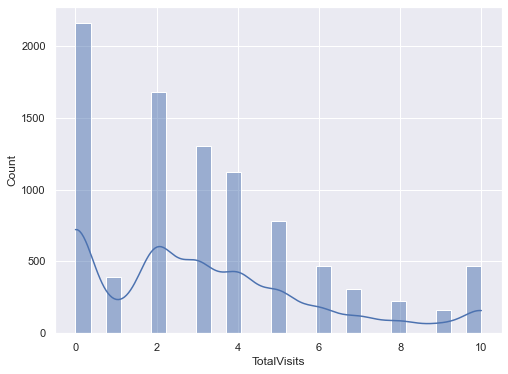

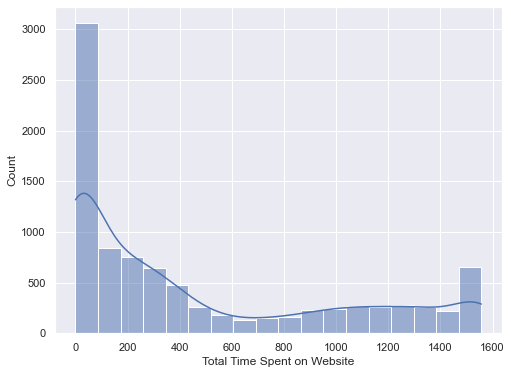

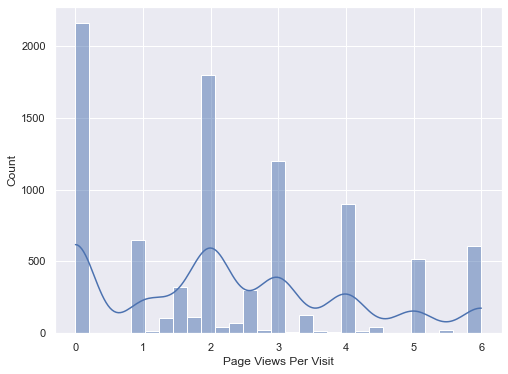

In [20]:
# Univariate Analysis of numeric variables

for m in ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]:
    plt.figure(figsize=(8,6))
    sns.histplot(x=df[m],data=df,kde=True)
    plt.show()

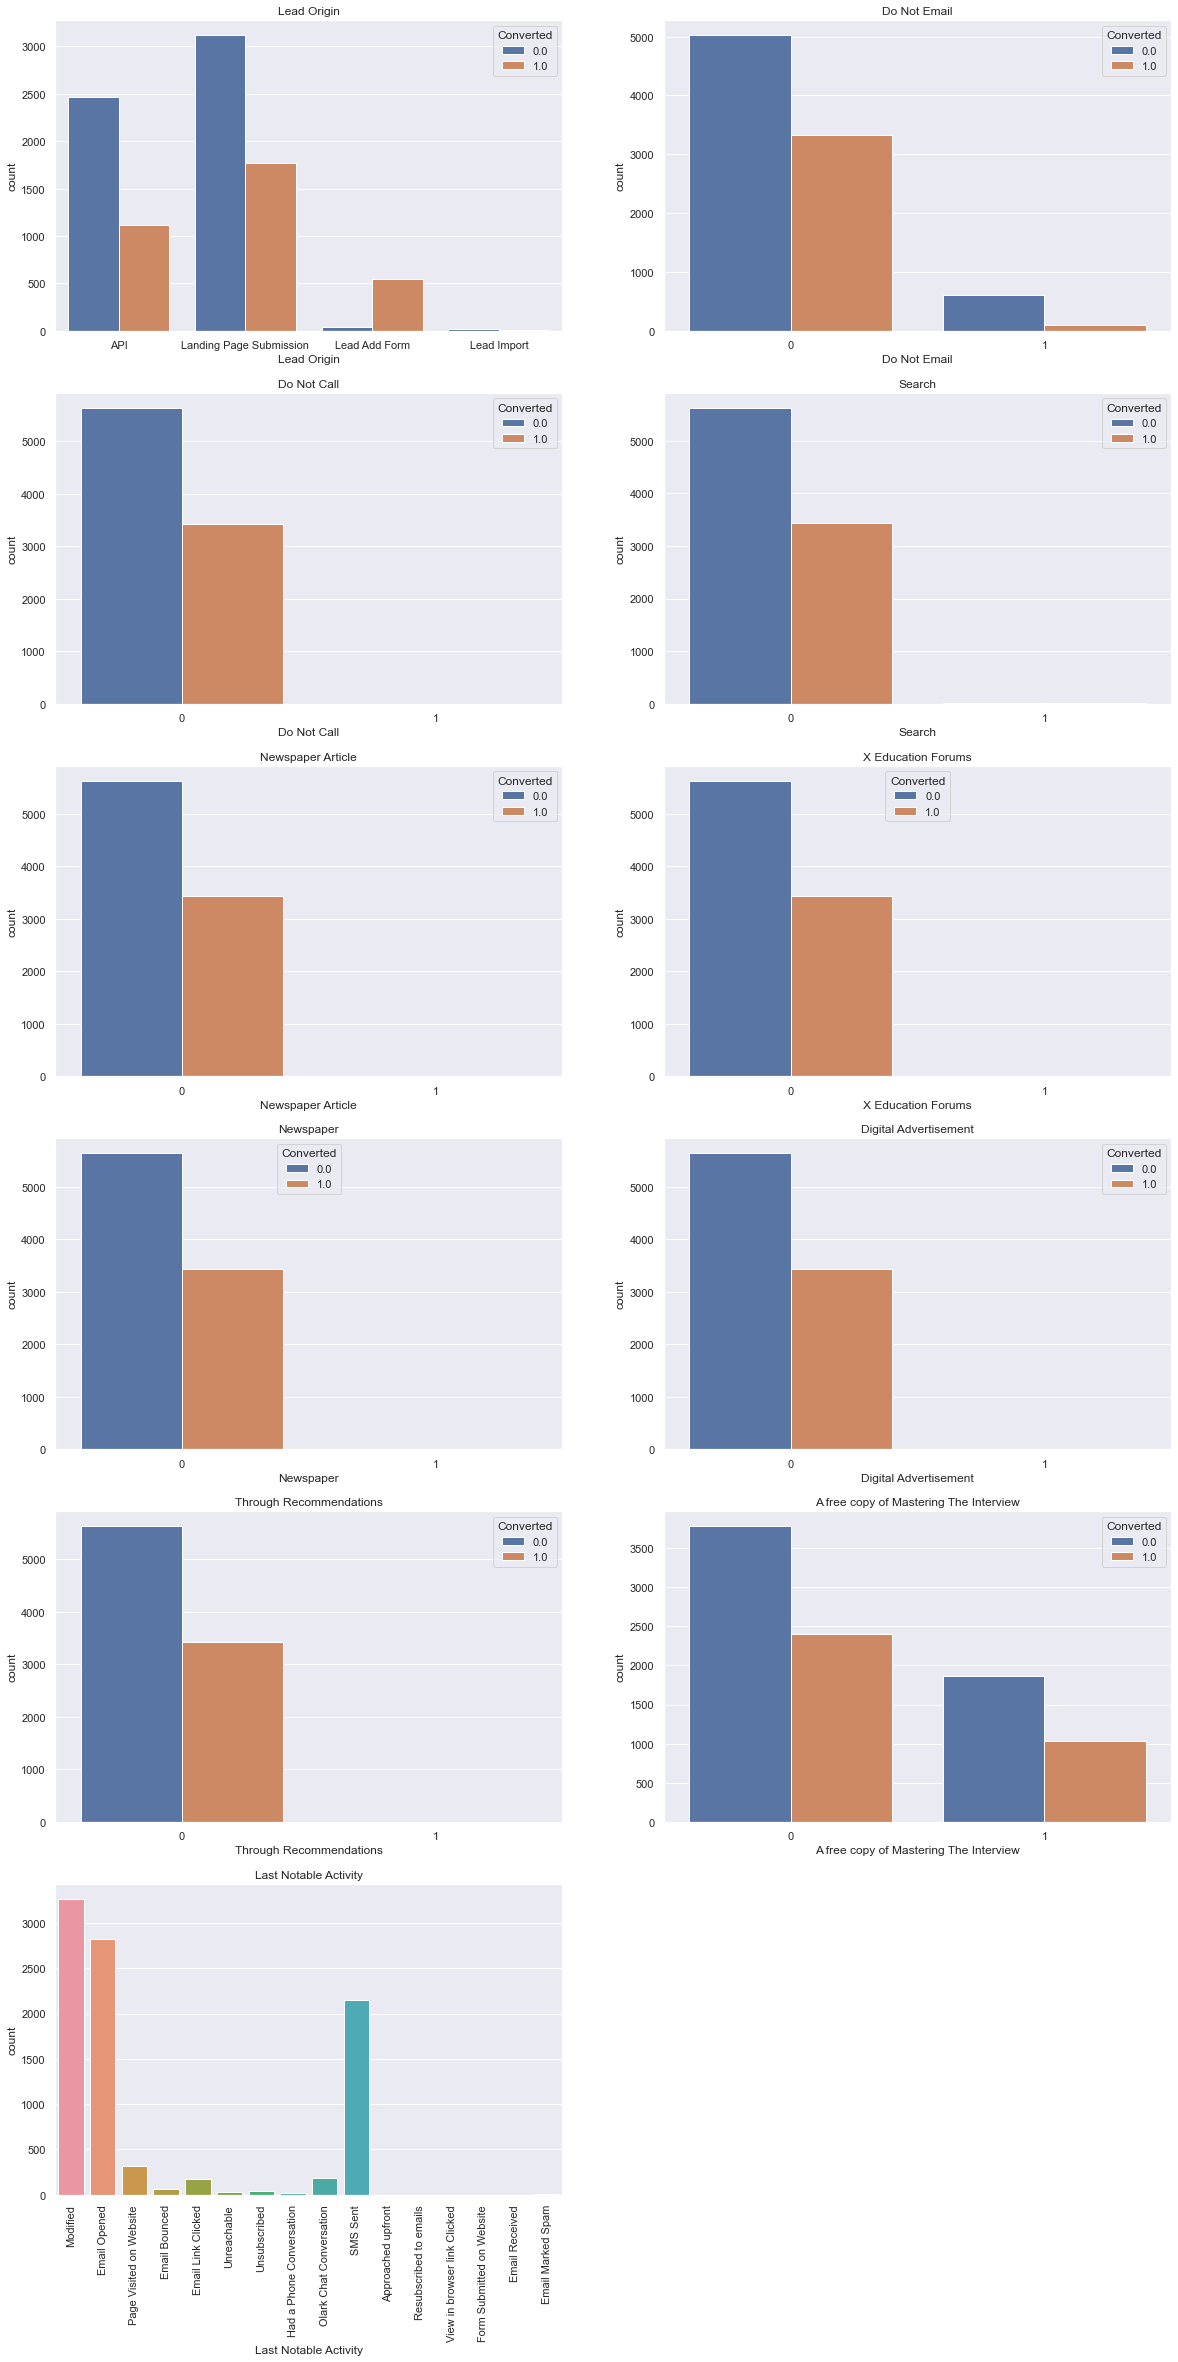

In [21]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(df['Lead Origin'],hue=df.Converted)
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df['Do Not Email'],hue=df.Converted)
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df['Do Not Call'],hue=df.Converted)
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df['Search'],hue=df.Converted)
plt.title('Search')

plt.subplot(6,2,5)
sns.countplot(df['Newspaper Article'],hue=df.Converted)
plt.title('Newspaper Article')

plt.subplot(6,2,6)
sns.countplot(df['X Education Forums'],hue=df.Converted)
plt.title('X Education Forums')

plt.subplot(6,2,7)
sns.countplot(df['Newspaper'],hue=df.Converted)
plt.title('Newspaper')

plt.subplot(6,2,8)
sns.countplot(df['Digital Advertisement'],hue=df.Converted)
plt.title('Digital Advertisement')

plt.subplot(6,2,9)
sns.countplot(df['Through Recommendations'],hue=df.Converted)
plt.title('Through Recommendations')

plt.subplot(6,2,10)
sns.countplot(df['A free copy of Mastering The Interview'],hue=df.Converted)
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,11)
sns.countplot(df['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

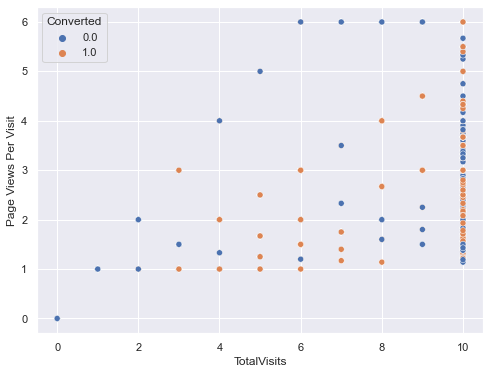

In [22]:
# Bi-variate Analysis

plt.figure(figsize=(8,6))
sns.scatterplot(x="TotalVisits",y="Page Views Per Visit",hue="Converted",data=df);

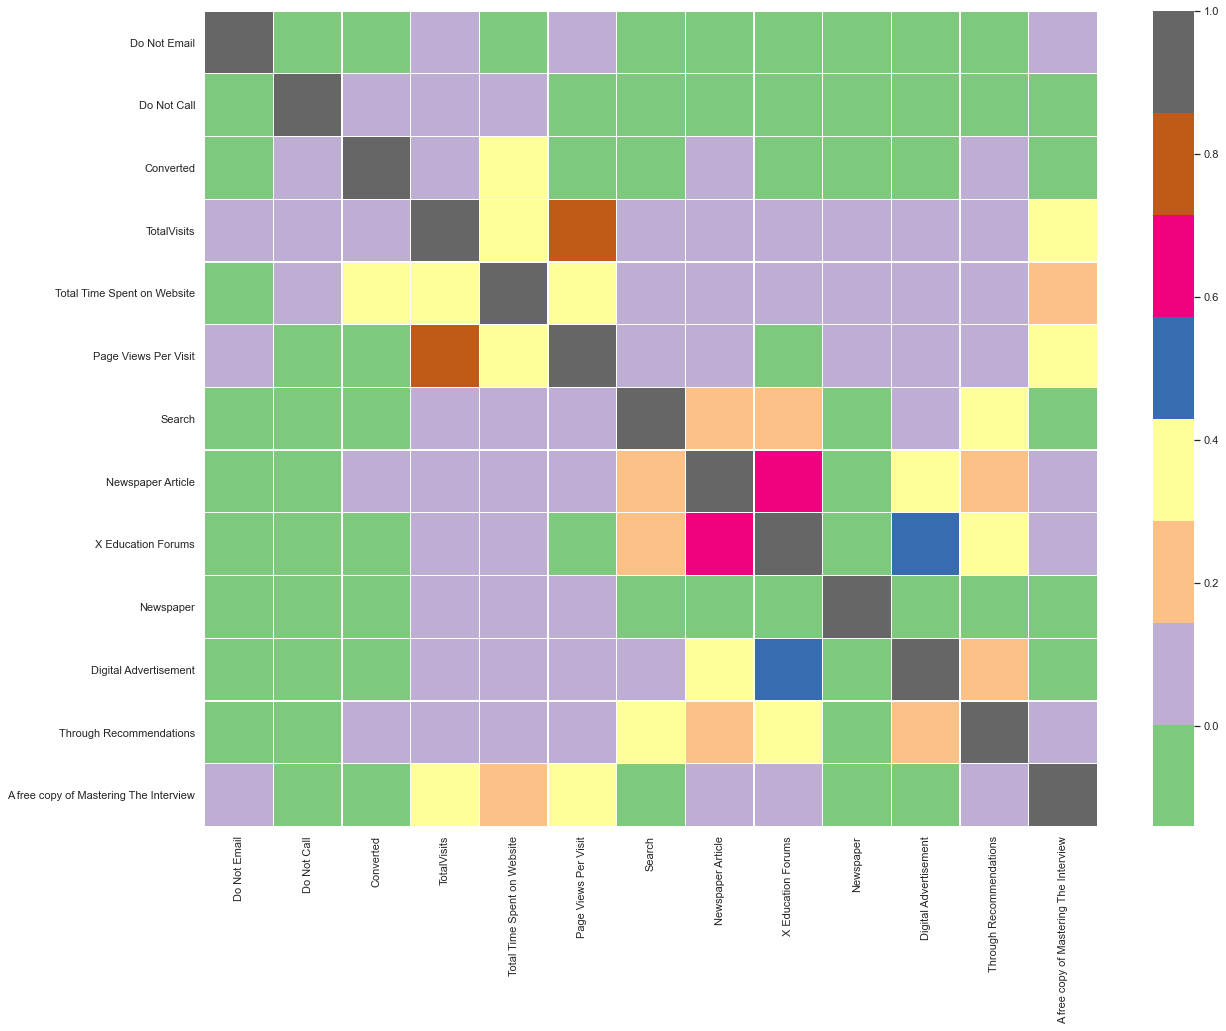

In [23]:
# Scatterplot of collinearity

plt.figure(figsize=[20,15])
sns.heatmap(df.corr(),cmap="Accent",linewidths=0.2);

#### Dummy Variable Creation

In [24]:
# Obtaining "Lead Origin" dummy variables

lead_origin_dummies=pd.get_dummies(df["Lead Origin"],drop_first=True)
lead_origin_dummies

,Landing Page Submission,Lead Add Form,Lead Import
Lead Number,,,
660737,0,0,0
660728,0,0,0
660727,1,0,0
660719,1,0,0
660681,1,0,0
...,...,...,...
579564,1,0,0
579546,1,0,0
579545,1,0,0


In [25]:
# Concatinating "Lead Origin" dummy variables to our dataset

df=pd.concat([df,lead_origin_dummies],axis=1)
df.drop("Lead Origin",axis=1,inplace=True)
df.head()

,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,Landing Page Submission,Lead Add Form,Lead Import
Lead Number,,,,,,,,,,,,,,,,,,,
660737,Olark Chat,0,0,0.0,0.0,0.0,0.0,Page Visited on Website,0,0,0,0,0,0,0,Modified,0,0,0
660728,Organic Search,0,0,0.0,5.0,674.0,2.5,Email Opened,0,0,0,0,0,0,0,Email Opened,0,0,0
660727,Direct Traffic,0,0,1.0,2.0,1532.0,2.0,Email Opened,0,0,0,0,0,0,1,Email Opened,1,0,0
660719,Direct Traffic,0,0,0.0,1.0,305.0,1.0,Unreachable,0,0,0,0,0,0,0,Modified,1,0,0
660681,Google,0,0,1.0,2.0,1428.0,1.0,Converted to Lead,0,0,0,0,0,0,0,Modified,1,0,0


In [26]:
# Obtaining "Lead Source" dummy variables and adding it to our dataset

lead_source_dummies=pd.get_dummies(df["Lead Source"],drop_first=True)
df=pd.concat([df,lead_source_dummies],axis=1)
df.drop("Lead Source",axis=1,inplace=True)
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,...,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google,testone,welearnblog_Home,youtubechannel
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0.0,0.0,0.0,0.0,Page Visited on Website,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660728,0,0,0.0,5.0,674.0,2.5,Email Opened,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660727,0,0,1.0,2.0,1532.0,2.0,Email Opened,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660719,0,0,0.0,1.0,305.0,1.0,Unreachable,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660681,0,0,1.0,2.0,1428.0,1.0,Converted to Lead,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Obtaining "Last Activity" dummy variables and adding it to our dataset

last_activity_dummies=pd.get_dummies(df["Last Activity"],drop_first=True)
df=pd.concat([df,last_activity_dummies],axis=1)
df.drop("Last Activity",axis=1,inplace=True)
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Form Submitted on Website,Had a Phone Conversation,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked,Visited Booth in Tradeshow
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660728,0,0,0.0,5.0,674.0,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660727,0,0,1.0,2.0,1532.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660719,0,0,0.0,1.0,305.0,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
660681,0,0,1.0,2.0,1428.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Obtaining "Last Notable Activity" dummy variables and adding it to our dataset

last_notable_activity_dummies=pd.get_dummies(df["Last Notable Activity"],drop_first=True,prefix="Notable")
df=pd.concat([df,last_notable_activity_dummies],axis=1)
df.drop("Last Notable Activity",axis=1,inplace=True)
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Notable_Form Submitted on Website,Notable_Had a Phone Conversation,Notable_Modified,Notable_Olark Chat Conversation,Notable_Page Visited on Website,Notable_Resubscribed to emails,Notable_SMS Sent,Notable_Unreachable,Notable_Unsubscribed,Notable_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
660728,0,0,0.0,5.0,674.0,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660727,0,0,1.0,2.0,1532.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660719,0,0,0.0,1.0,305.0,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
660681,0,0,1.0,2.0,1428.0,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [29]:
# Final columns in our dataset

df.columns

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Landing Page Submission',
       'Lead Add Form', 'Lead Import', 'Direct Traffic', 'Facebook', 'Google',
       'Live Chat', 'NC_EDM', 'Olark Chat', 'Organic Search',
       'Pay per Click Ads', 'Press_Release', 'Reference', 'Referral Sites',
       'Social Media', 'WeLearn', 'Welingak Website', 'bing', 'blog', 'google',
       'testone', 'welearnblog_Home', 'youtubechannel', 'Converted to Lead',
       'Email Bounced', 'Email Link Clicked', 'Email Marked Spam',
       'Email Opened', 'Email Received', 'Form Submitted on Website',
       'Had a Phone Conversation', 'Olark Chat Conversation',
       'Page Visited on Website', 'Resubscribed to emails', 'SMS Sent',
       'Unreachable

In [30]:
# Checking the data type of our columns and presence of null values

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 660737 to 579533
Data columns (total 67 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Do Not Email                            9074 non-null   int32  
 1   Do Not Call                             9074 non-null   int32  
 2   Converted                               9074 non-null   float64
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   float64
 5   Page Views Per Visit                    9074 non-null   float64
 6   Search                                  9074 non-null   int32  
 7   Newspaper Article                       9074 non-null   int32  
 8   X Education Forums                      9074 non-null   int32  
 9   Newspaper                               9074 non-null   int32  
 10  Digital Advertisement                   9074 non-null

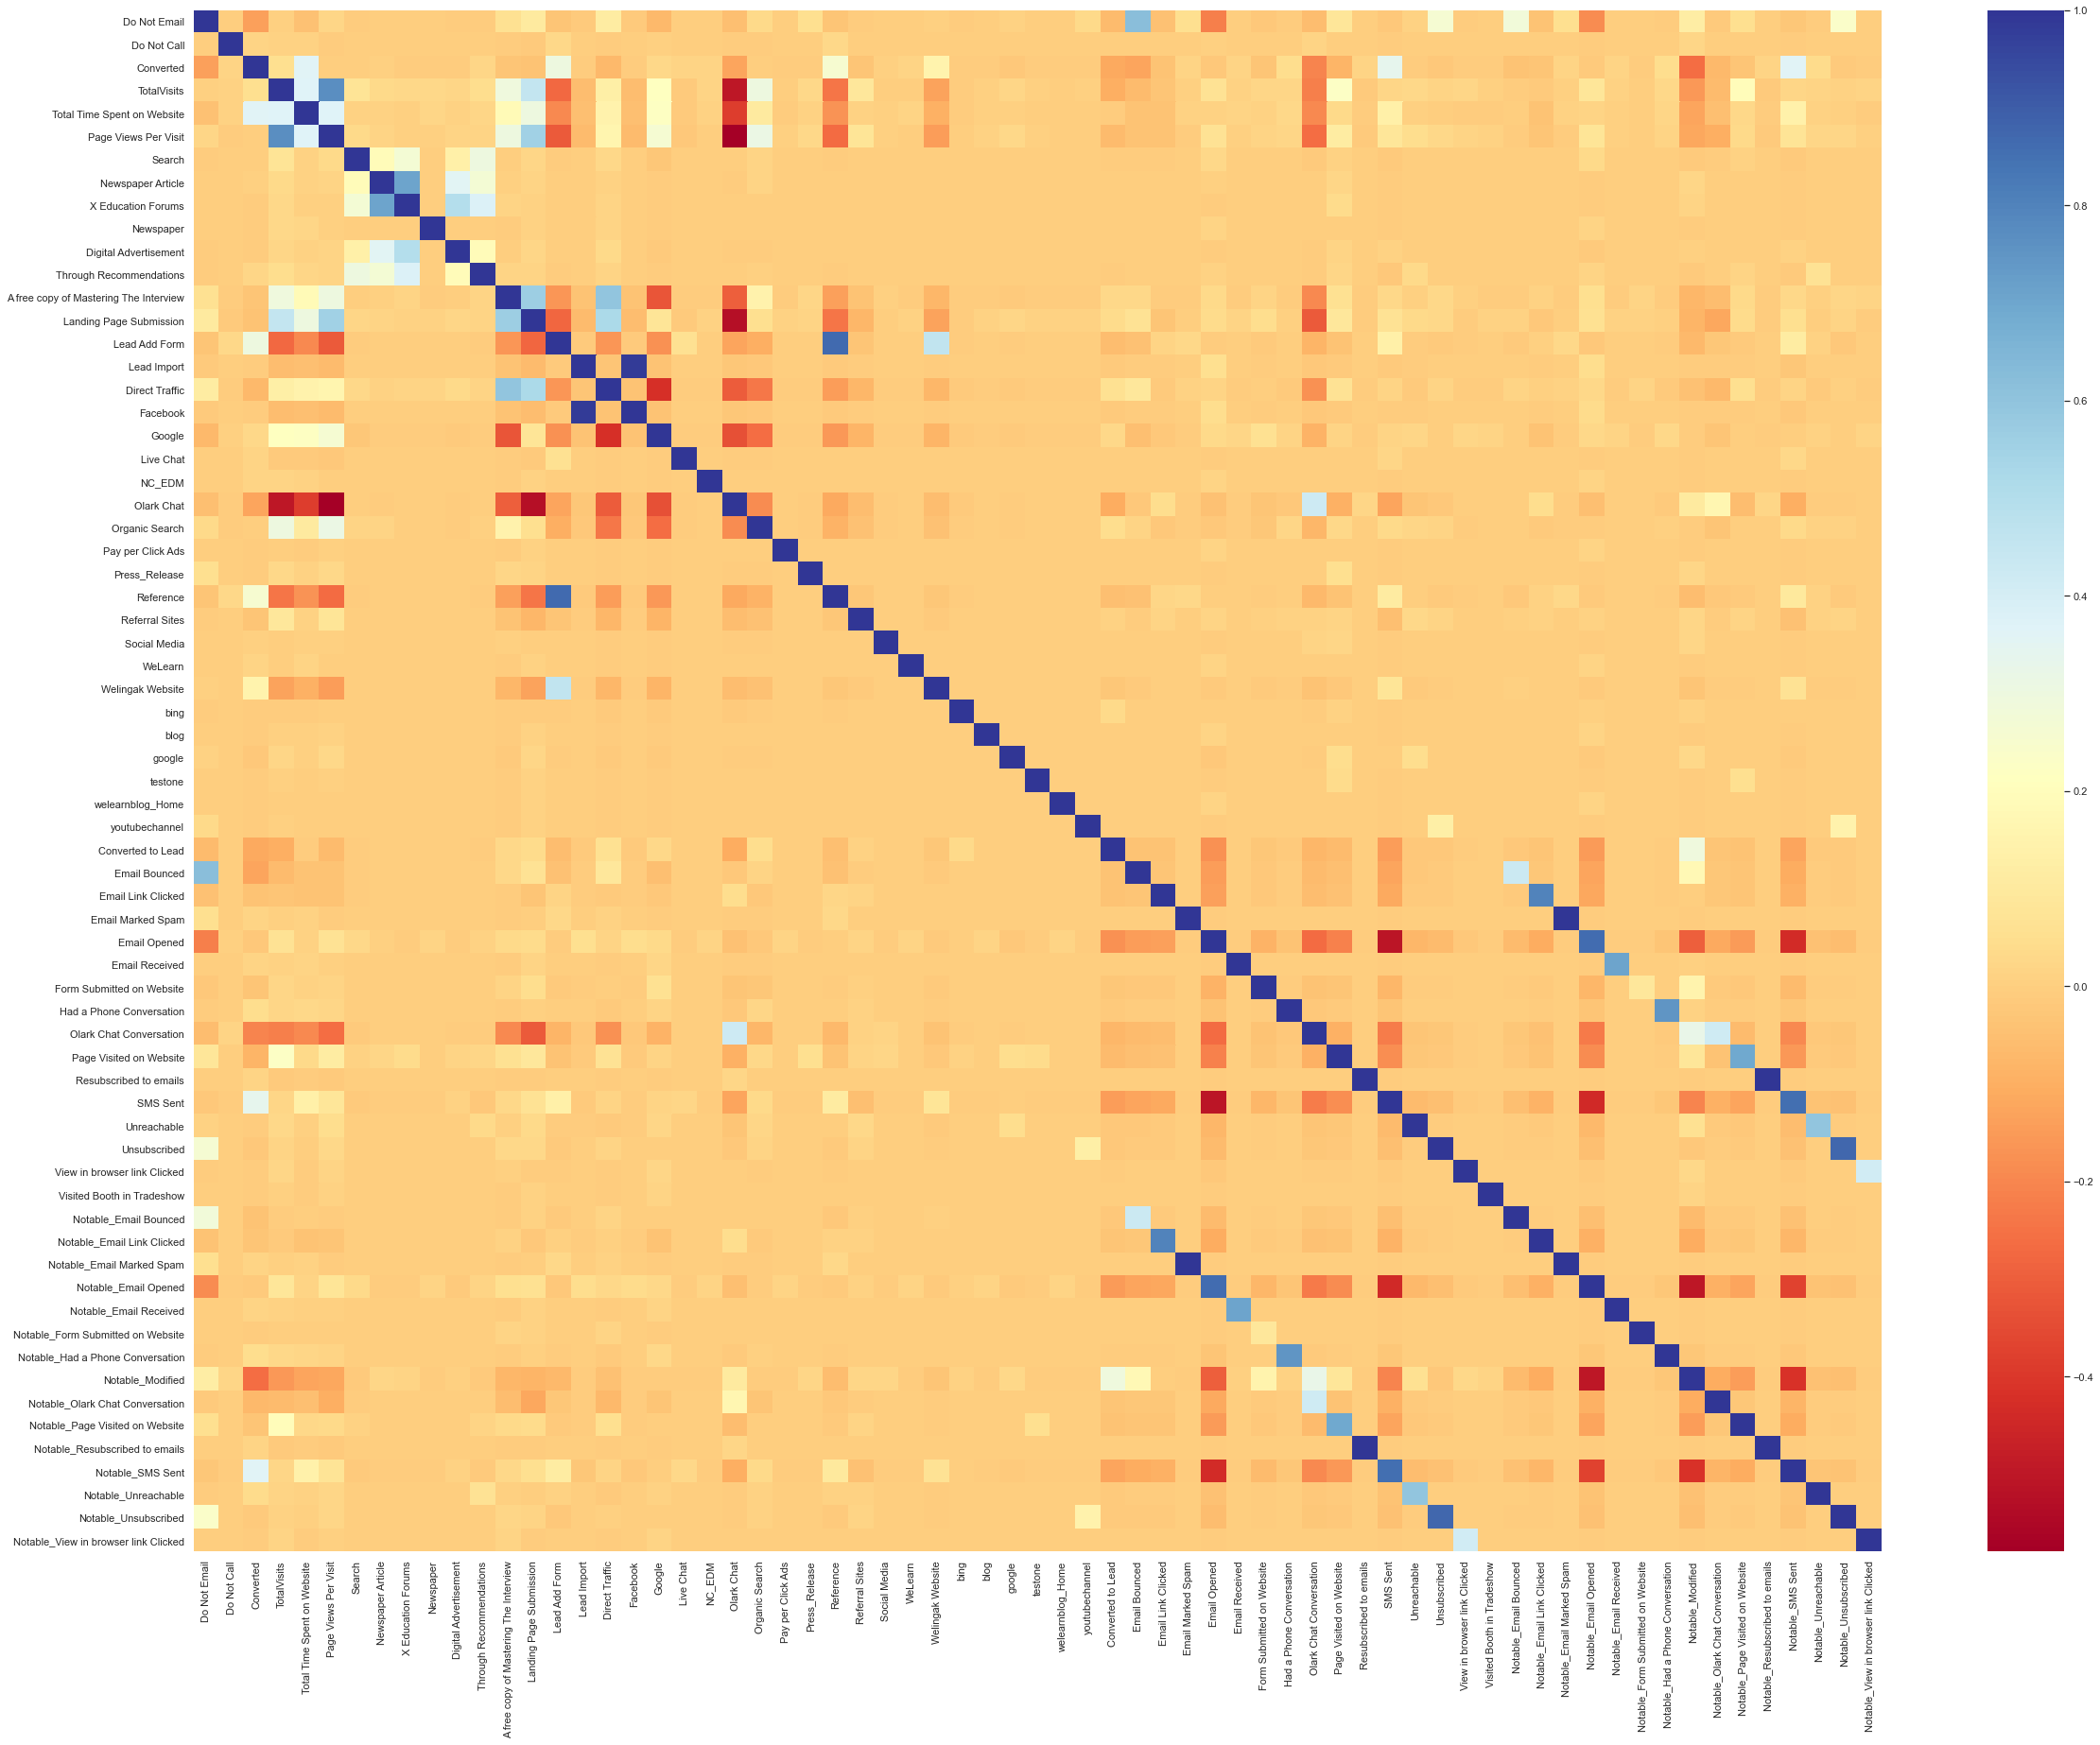

In [31]:
# Visualizing correlation between variables of our final dataset

plt.figure(figsize=[40,30])
sns.heatmap(df.corr(),cmap="RdYlBu");

#### Training Test Split

In [32]:
# Obtaining two dataset sets, for training and testing purposes

df_train, df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=101)

In [33]:
# Checking the head of training dataset

df_train.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Notable_Form Submitted on Website,Notable_Had a Phone Conversation,Notable_Modified,Notable_Olark Chat Conversation,Notable_Page Visited on Website,Notable_Resubscribed to emails,Notable_SMS Sent,Notable_Unreachable,Notable_Unsubscribed,Notable_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
585607,1,0,0.0,6.0,311.0,6.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
583698,0,0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
588005,0,0,1.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
611316,0,0,1.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
581851,0,0,0.0,1.0,232.0,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Model Preprocessing

In [34]:
# Seperating out the target and independent variables

y_train=df_train.Converted
X_train=df_train.drop("Converted",axis=1)

In [35]:
# Importing MinMaxScaler to scale columns

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [36]:
# Scaling the only variable which has information to scale

X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]=scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

In [37]:
# Checking the scaling operation performed

X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6351.000000,6351.000000,6351.000000
mean,0.317808,0.307070,0.376155
std,0.276552,0.338877,0.297769
min,0.000000,0.000000,0.000000
25%,0.100000,0.007707,0.166667
50%,0.300000,0.159281,0.333333
75%,0.500000,0.602119,0.500000
max,1.000000,1.000000,1.000000


In [38]:
# Adding constant variable

X_train=sm.add_constant(X_train)

#### Model 1

In [39]:
# Creating our first model and checking its summary

log=sm.GLM(y_train,X_train,family=sm.families.Binomial())
model1=log.fit()

In [40]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6291
Model Family:                Binomial   Df Model:                           59
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2768.6
Date:                Sat, 06 Feb 2021   Deviance:                       5537.2
Time:                        13:13:22   Pearson chi2:                 6.35e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     44.1556   9.56e+04      0.000      1.000   -1.87e+05    1.87e+05
Do Not Email                              -1.1217      0.202     -5.544      0.000      -1.518      -0.725
Do Not Call                               22.7632   5.34e+04      0.000      1.000   -1.05e+05    1.05e+05
TotalVisits                                1.2894      0.197      6.543      0.000       0.903       1.676
Total Time Spent on Website                3.2781      0.115     28.456      0.000       3.052       3.504
Page Views Per Visit                      -0.8653      0.202     -4.282      0.000      -1.261      -0.469
Search                                    -1.8670      1.230     -1.518      0.129      -4.277       0.544
Newspaper Article                         -0.3244   4.83e+04  -6.72e-06      1.000   -9.46e+04    9.46e+04
X Education Forums                        -0.3244   4.83e+04  -6.72e-06      1.000   -9.46e+04    9.46e+04
Newspaper                                -25.3173   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Digital Advertisement                    -23.2837   5.48e+04     -0.000      1.000   -1.07e+05    1.07e+05
Through Recommendations                    2.7329      1.612      1.695      0.090      -0.426       5.892
A free copy of Mastering The Interview    -0.0207      0.103     -0.200      0.841      -0.223       0.181
Landing Page Submission                   -0.1531      0.104     -1.468      0.142      -0.358       0.051
Lead Add Form                              1.5789      1.398      1.129      0.259      -1.162       4.320
Lead Import                               24.7744   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Direct Traffic                           -23.5950   5.32e+04     -0.000      1.000   -1.04e+05    1.04e+05
Facebook                                 -47.0139   9.56e+04     -0.000      1.000   -1.87e+05    1.87e+05
Google                                   -23.3877   5.32e+04     -0.000      1.000   -1.04e+05    1.04e+05
Live Chat                                 -0.8579   7.73e+04  -1.11e-05      1.000   -1.52e+05    1.52e+05
NC_EDM                                 -5.393e-09   5.66e-05  -9.53e-05      1.000      -0.000       0.000
Olark Chat                               -22.4021   5.32e+04     -0.000      1.000   -1.04e+05    1.04e+05
Organic Search                           -23.6142   5.32e+04     -0.000      1.000   -1.04e+05    1.04e+05
Pay per Click Ads                        -45.0423   9.56e+04     -0.000      1.000   -1.87e+05    1.87e+05
Press_Release                            -45.9571   9.56e+04     -0.000      1.000   -1.87e+05    1.87e+05
Reference                                -21.0631   5.32e+04     -0.000      1.000   -1

In [41]:
# Creating LogisticRegeression instance

logreg=LogisticRegression()

In [42]:
# Getting the top 20 predictor variables

rfe=RFE(logreg,20)

rfe=rfe.fit(X_train,y_train)

In [43]:
# Checking the ranking of columns generated by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('const', False, 43),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 10),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', True, 1),
 ('Newspaper Article', False, 36),
 ('X Education Forums', False, 33),
 ('Newspaper', True, 1),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', False, 8),
 ('A free copy of Mastering The Interview', False, 44),
 ('Landing Page Submission', False, 32),
 ('Lead Add Form', True, 1),
 ('Lead Import', True, 1),
 ('Direct Traffic', False, 15),
 ('Facebook', False, 42),
 ('Google', False, 18),
 ('Live Chat', False, 37),
 ('NC_EDM', False, 46),
 ('Olark Chat', True, 1),
 ('Organic Search', False, 16),
 ('Pay per Click Ads', False, 34),
 ('Press_Release', False, 24),
 ('Reference', True, 1),
 ('Referral Sites', False, 17),
 ('Social Media', False, 40),
 ('WeLearn', False, 26),
 ('Welingak Website', True, 1),
 ('bing', False, 14),
 ('blog', False, 45),
 ('google', False, 13

In [44]:
# Selecting only the top 20 columns suggested by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'Newspaper', 'Digital Advertisement',
       'Lead Add Form', 'Lead Import', 'Olark Chat', 'Reference',
       'Welingak Website', 'Email Bounced', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'Notable_Email Link Clicked',
       'Notable_Email Opened', 'Notable_Modified',
       'Notable_Olark Chat Conversation', 'Notable_Page Visited on Website'],
      dtype='object')

In [45]:
# List of columns discarded for model training

X_train.columns[~rfe.support_]

Index(['const', 'Do Not Call', 'Newspaper Article', 'X Education Forums',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Landing Page Submission', 'Direct Traffic', 'Facebook', 'Google',
       'Live Chat', 'NC_EDM', 'Organic Search', 'Pay per Click Ads',
       'Press_Release', 'Referral Sites', 'Social Media', 'WeLearn', 'bing',
       'blog', 'google', 'testone', 'welearnblog_Home', 'youtubechannel',
       'Converted to Lead', 'Email Link Clicked', 'Email Marked Spam',
       'Email Opened', 'Email Received', 'Form Submitted on Website',
       'Page Visited on Website', 'Resubscribed to emails', 'SMS Sent',
       'Unreachable', 'Unsubscribed', 'View in browser link Clicked',
       'Visited Booth in Tradeshow', 'Notable_Email Bounced',
       'Notable_Email Marked Spam', 'Notable_Email Received',
       'Notable_Form Submitted on Website', 'Notable_Had a Phone Conversation',
       'Notable_Resubscribed to emails', 'Notable_SMS Sent',
       '

In [46]:
# Adding constant variable back 

X_train_sm=sm.add_constant(X_train[col])
X_train_sm.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper,Digital Advertisement,Lead Add Form,Lead Import,...,Reference,Welingak Website,Email Bounced,Had a Phone Conversation,Olark Chat Conversation,Notable_Email Link Clicked,Notable_Email Opened,Notable_Modified,Notable_Olark Chat Conversation,Notable_Page Visited on Website
Lead Number,,,,,,,,,,,,,,,,,,,,,
585607,1.0,1,0.6,0.199743,1.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
583698,1.0,0,0.0,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
588005,1.0,0,0.0,0.000000,0.000000,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
611316,1.0,0,0.0,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581851,1.0,0,0.1,0.149004,0.166667,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Model 2 - Top 20 selected columns

In [47]:
# Creating our second model with the selected 20 columns

log=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
model2=log.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2806.8
Date:                Sat, 06 Feb 2021   Deviance:                       5613.5
Time:                        13:13:34   Pearson chi2:                 6.41e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.8151      0.116     -7.056      0.000      -1.042      -0.589
Do Not Email                       -1.1431      0.184     -6.203      0.000      -1.504      -0.782
TotalVisits                         1.3069      0.190      6.877      0.000       0.934       1.679
Total Time Spent on Website         3.3034      0.114     28.978      0.000       3.080       3.527
Page Views Per Visit               -0.8762      0.193     -4.542      0.000      -1.254      -0.498
Search                             -1.3360      1.057     -1.264      0.206      -3.407       0.735
Newspaper                         -23.4546   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Digital Advertisement             -21.0973   1.63e+04     -0.001      0.999   -3.19e+04    3.18e+04
Lead Add Form                       3.0824      1.135      2.716      0.007       0.858       5.307
Lead Import                         1.4783      0.501      2.949      0.003       0.496       2.461
Olark Chat                          1.2732      0.126     10.089      0.000       1.026       1.520
Reference                           1.1814      1.151      1.026      0.305      -1.075       3.438
Welingak Website                    3.5115      1.518      2.313      0.021       0.536       6.487
Email Bounced                      -1.5972      0.403     -3.962      0.000      -2.387      -0.807
Had a Phone Conversation            1.5591      0.611      2.553      0.011       0.362       2.756
Olark Chat Conversation            -1.3043      0.191     -6.841      0.000      -1.678      -0.931
Notable_Email Link Clicked         -1.8971      0.246     -7.705      0.000      -2.380      -1.415
Notable_Email Opened               -1.4204      0.086    -16.608      0.000      -1.588      -1.253
Notable_Modified                   -1.8036      0.093    -19.292      0.000      -1.987      -1.620
Notable_Olark Chat Conversation    -1.9644      0.380     -5.169      0.000      -2.709      -1.220
Notable_Page Visited on Website    -1.9892      0.198    -10.067      0.000      -2.377      -1.602
===================================================================================================
"""

In [48]:
# Checking VIF of our variables

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Lead Add Form,58.85
10,Reference,44.79
11,Welingak Website,15.02
3,Page Views Per Visit,6.63
1,TotalVisits,6.25
17,Notable_Modified,2.13
2,Total Time Spent on Website,2.05
14,Olark Chat Conversation,1.94
0,Do Not Email,1.85
16,Notable_Email Opened,1.83


#### Model 3 - Dropping "Newspaper"

In [49]:
# Dropping "Newspaper" column because of high p-value and negative co-efficient

X_train_sm.drop("Newspaper",axis=1,inplace=True)

In [50]:
# Re-creating our model

log=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
model3=log.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2808.8
Date:                Sat, 06 Feb 2021   Deviance:                       5617.5
Time:                        13:13:35   Pearson chi2:                 6.41e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.8110      0.115     -7.024      0.000      -1.037      -0.585
Do Not Email                       -1.1429      0.184     -6.204      0.000      -1.504      -0.782
TotalVisits                         1.2902      0.190      6.796      0.000       0.918       1.662
Total Time Spent on Website         3.2973      0.114     28.951      0.000       3.074       3.520
Page Views Per Visit               -0.8667      0.193     -4.496      0.000      -1.244      -0.489
Search                             -1.3271      1.055     -1.257      0.209      -3.396       0.742
Digital Advertisement             -21.0964   1.63e+04     -0.001      0.999   -3.19e+04    3.18e+04
Lead Add Form                       3.0796      1.135      2.713      0.007       0.855       5.304
Lead Import                         1.4753      0.501      2.943      0.003       0.493       2.458
Olark Chat                          1.2698      0.126     10.068      0.000       1.023       1.517
Reference                           1.1802      1.151      1.025      0.305      -1.076       3.436
Welingak Website                    3.5101      1.518      2.312      0.021       0.534       6.486
Email Bounced                      -1.5968      0.403     -3.963      0.000      -2.387      -0.807
Had a Phone Conversation            1.5591      0.611      2.554      0.011       0.363       2.756
Olark Chat Conversation            -1.3046      0.191     -6.844      0.000      -1.678      -0.931
Notable_Email Link Clicked         -1.8959      0.246     -7.703      0.000      -2.378      -1.413
Notable_Email Opened               -1.4219      0.085    -16.632      0.000      -1.590      -1.254
Notable_Modified                   -1.8029      0.093    -19.294      0.000      -1.986      -1.620
Notable_Olark Chat Conversation    -1.9607      0.380     -5.164      0.000      -2.705      -1.217
Notable_Page Visited on Website    -1.9839      0.197    -10.047      0.000      -2.371      -1.597
===================================================================================================
"""

#### Model 4 - Dropping "Digital Advertisement"

In [51]:
# Dropping "Digital Advertisement" column because of high p-value and negative co-efficient

X_train_sm.drop("Digital Advertisement",axis=1,inplace=True)
log=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
model4=log.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2810.2
Date:                Sat, 06 Feb 2021   Deviance:                       5620.4
Time:                        13:13:35   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.8122      0.115     -7.036      0.000      -1.038      -0.586
Do Not Email                       -1.1400      0.184     -6.189      0.000      -1.501      -0.779
TotalVisits                         1.2853      0.190      6.773      0.000       0.913       1.657
Total Time Spent on Website         3.3005      0.114     28.981      0.000       3.077       3.524
Page Views Per Visit               -0.8705      0.193     -4.517      0.000      -1.248      -0.493
Search                             -1.5348      1.011     -1.519      0.129      -3.515       0.446
Lead Add Form                       3.0778      1.135      2.712      0.007       0.853       5.302
Lead Import                         1.4728      0.501      2.939      0.003       0.490       2.455
Olark Chat                          1.2687      0.126     10.063      0.000       1.022       1.516
Reference                           1.1806      1.151      1.026      0.305      -1.075       3.436
Welingak Website                    3.5104      1.518      2.312      0.021       0.535       6.486
Email Bounced                      -1.5981      0.403     -3.966      0.000      -2.388      -0.808
Had a Phone Conversation            1.5619      0.610      2.559      0.010       0.366       2.758
Olark Chat Conversation            -1.3041      0.191     -6.842      0.000      -1.678      -0.931
Notable_Email Link Clicked         -1.8925      0.246     -7.689      0.000      -2.375      -1.410
Notable_Email Opened               -1.4179      0.085    -16.596      0.000      -1.585      -1.250
Notable_Modified                   -1.8007      0.093    -19.278      0.000      -1.984      -1.618
Notable_Olark Chat Conversation    -1.9585      0.380     -5.158      0.000      -2.703      -1.214
Notable_Page Visited on Website    -1.9796      0.197    -10.026      0.000      -2.367      -1.593
===================================================================================================
"""

#### Model 5 - Dropping "Reference"

In [52]:
# Dropping "Reference" column because of high p-value

X_train_sm.drop("Reference",axis=1,inplace=True)
log=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
model5=log.fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2810.6
Date:                Sat, 06 Feb 2021   Deviance:                       5621.2
Time:                        13:13:35   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.8113      0.115     -7.026      0.000      -1.038      -0.585
Do Not Email                       -1.1390      0.184     -6.186      0.000      -1.500      -0.778
TotalVisits                         1.2857      0.190      6.775      0.000       0.914       1.658
Total Time Spent on Website         3.2996      0.114     28.974      0.000       3.076       3.523
Page Views Per Visit               -0.8718      0.193     -4.524      0.000      -1.250      -0.494
Search                             -1.5344      1.010     -1.519      0.129      -3.515       0.446
Lead Add Form                       4.2305      0.228     18.561      0.000       3.784       4.677
Lead Import                         1.4720      0.501      2.937      0.003       0.490       2.454
Olark Chat                          1.2673      0.126     10.049      0.000       1.020       1.514
Welingak Website                    2.3564      1.032      2.284      0.022       0.334       4.378
Email Bounced                      -1.5995      0.403     -3.970      0.000      -2.389      -0.810
Had a Phone Conversation            1.5610      0.610      2.558      0.011       0.365       2.757
Olark Chat Conversation            -1.3047      0.191     -6.846      0.000      -1.678      -0.931
Notable_Email Link Clicked         -1.8908      0.246     -7.688      0.000      -2.373      -1.409
Notable_Email Opened               -1.4184      0.085    -16.602      0.000      -1.586      -1.251
Notable_Modified                   -1.7996      0.093    -19.274      0.000      -1.983      -1.617
Notable_Olark Chat Conversation    -1.9572      0.380     -5.155      0.000      -2.701      -1.213
Notable_Page Visited on Website    -1.9814      0.198    -10.027      0.000      -2.369      -1.594
===================================================================================================
"""

#### Model 6 -  Dropping "Search"

In [53]:
# Dropping "Search" column because of high p-value

X_train_sm.drop("Search",axis=1,inplace=True)
log=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
model6=log.fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2812.0
Date:                Sat, 06 Feb 2021   Deviance:                       5624.1
Time:                        13:13:35   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.8062      0.115     -6.984      0.000      -1.032      -0.580
Do Not Email                       -1.1380      0.184     -6.181      0.000      -1.499      -0.777
TotalVisits                         1.2606      0.189      6.672      0.000       0.890       1.631
Total Time Spent on Website         3.2988      0.114     28.969      0.000       3.076       3.522
Page Views Per Visit               -0.8620      0.192     -4.479      0.000      -1.239      -0.485
Lead Add Form                       4.2275      0.228     18.548      0.000       3.781       4.674
Lead Import                         1.4702      0.501      2.933      0.003       0.488       2.452
Olark Chat                          1.2636      0.126     10.016      0.000       1.016       1.511
Welingak Website                    2.3560      1.032      2.284      0.022       0.334       4.378
Email Bounced                      -1.5998      0.403     -3.972      0.000      -2.389      -0.810
Had a Phone Conversation            1.5639      0.610      2.563      0.010       0.368       2.760
Olark Chat Conversation            -1.3024      0.191     -6.835      0.000      -1.676      -0.929
Notable_Email Link Clicked         -1.8896      0.246     -7.685      0.000      -2.371      -1.408
Notable_Email Opened               -1.4218      0.085    -16.651      0.000      -1.589      -1.254
Notable_Modified                   -1.8021      0.093    -19.305      0.000      -1.985      -1.619
Notable_Olark Chat Conversation    -1.9569      0.379     -5.158      0.000      -2.701      -1.213
Notable_Page Visited on Website    -1.9744      0.197     -9.999      0.000      -2.361      -1.587
===================================================================================================
"""

In [54]:
X_train_sm.drop("const",axis=1,inplace=True)

In [55]:
# Re-checking VIF for our model

col=X_train_sm.columns
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,6.62
1,TotalVisits,6.21
13,Notable_Modified,2.12
2,Total Time Spent on Website,2.05
10,Olark Chat Conversation,1.94
0,Do Not Email,1.85
12,Notable_Email Opened,1.83
8,Email Bounced,1.79
6,Olark Chat,1.69
4,Lead Add Form,1.39


#### Model 7 - Dropping "Page Views Per Visit"

In [56]:
# Dropping "Page Views Per Visit" column because of high p-value

X_train_sm.drop("Page Views Per Visit",axis=1,inplace=True)
X_train_sm=sm.add_constant(X_train_sm)
log=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
model7=log.fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2822.2
Date:                Sat, 06 Feb 2021   Deviance:                       5644.3
Time:                        13:13:36   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.0496      0.102    -10.263      0.000      -1.250      -0.849
Do Not Email                       -1.1687      0.184     -6.356      0.000      -1.529      -0.808
TotalVisits                         0.7677      0.154      5.001      0.000       0.467       1.069
Total Time Spent on Website         3.2871      0.114     28.932      0.000       3.064       3.510
Lead Add Form                       4.4446      0.223     19.913      0.000       4.007       4.882
Lead Import                         1.6896      0.499      3.386      0.001       0.712       2.668
Olark Chat                          1.4769      0.118     12.556      0.000       1.246       1.707
Welingak Website                    2.3540      1.031      2.282      0.022       0.332       4.376
Email Bounced                      -1.5114      0.401     -3.771      0.000      -2.297      -0.726
Had a Phone Conversation            1.5770      0.609      2.591      0.010       0.384       2.770
Olark Chat Conversation            -1.2934      0.190     -6.795      0.000      -1.666      -0.920
Notable_Email Link Clicked         -1.8398      0.244     -7.536      0.000      -2.318      -1.361
Notable_Email Opened               -1.3991      0.085    -16.467      0.000      -1.566      -1.233
Notable_Modified                   -1.7741      0.093    -19.096      0.000      -1.956      -1.592
Notable_Olark Chat Conversation    -1.9002      0.378     -5.027      0.000      -2.641      -1.159
Notable_Page Visited on Website    -1.8163      0.192     -9.440      0.000      -2.193      -1.439
===================================================================================================
"""

In [57]:
X_train_sm.drop("const",axis=1,inplace=True)

In [58]:
col=X_train_sm.columns
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.74
12,Notable_Modified,2.02
2,Total Time Spent on Website,1.95
9,Olark Chat Conversation,1.94
0,Do Not Email,1.83
7,Email Bounced,1.79
11,Notable_Email Opened,1.74
5,Olark Chat,1.65
3,Lead Add Form,1.38
13,Notable_Olark Chat Conversation,1.37


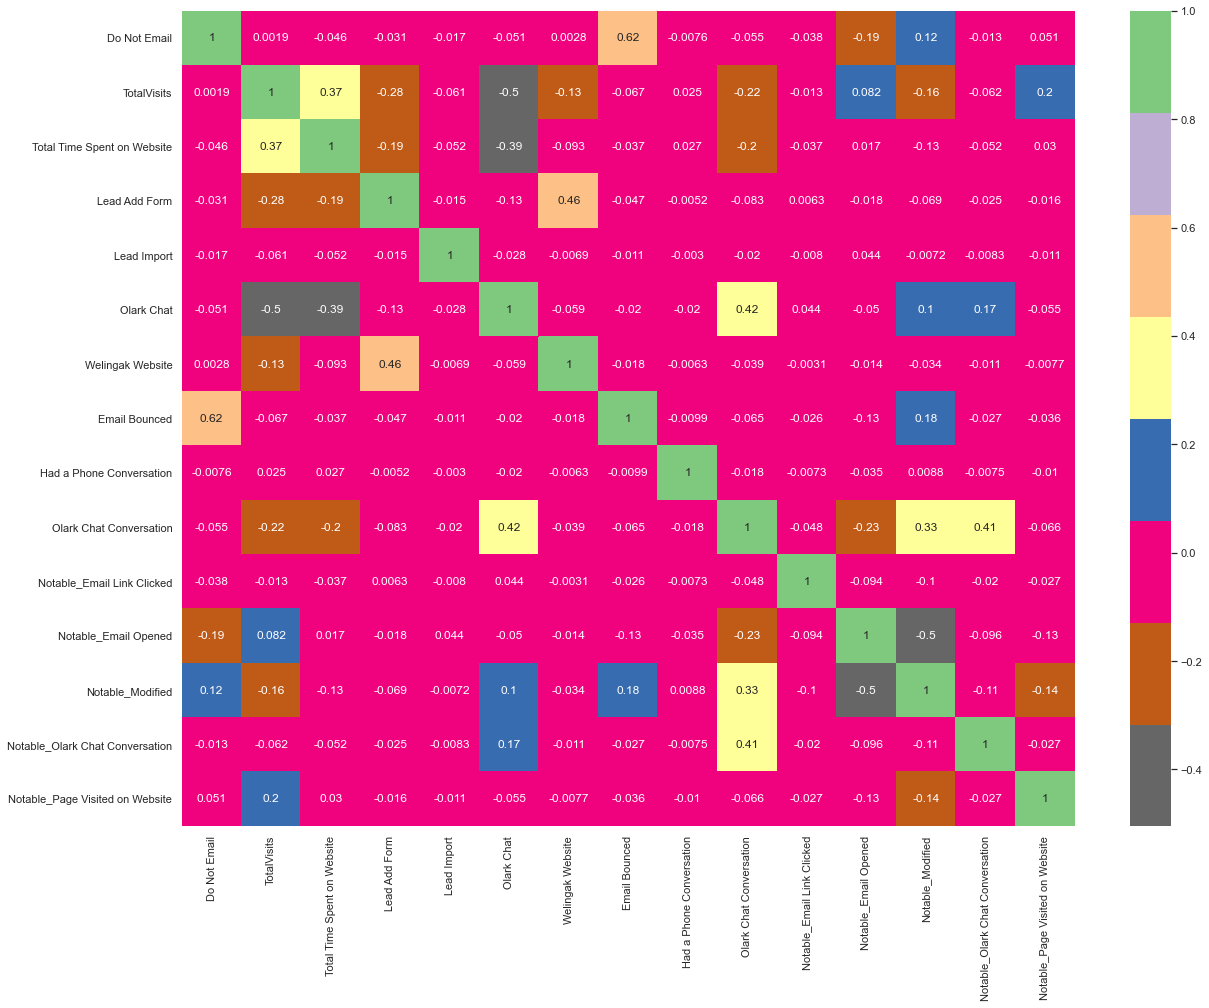

In [59]:
# Visualizing correlation between variables of our final model

plt.figure(figsize=[20,15])
col=X_train_sm.columns
sns.heatmap(df[col].corr(),annot=True,cmap="Accent_r");

#### Model Evaluation

In [60]:
X_train_sm=sm.add_constant(X_train_sm)

In [61]:
# Creating our prediction dataframe to analyze our model's performance

predictions=pd.DataFrame()

predictions["Probability"]=model7.predict(X_train[X_train_sm.columns])

predictions["Converted"]=y_train

predictions["Prediction"]=np.where(predictions.Probability>=0.4,1,0)

predictions.head()

,Probability,Converted,Prediction
Lead Number,,,
585607,0.249546,0.0,0
583698,0.274540,0.0,0
588005,0.880374,1.0,1
611316,0.605240,1.0,1
581851,0.094740,0.0,0


In [62]:
#  Creating the confusion matrix 
train_confusion_matrix = metrics.confusion_matrix(predictions.Converted, predictions.Prediction)
print(train_confusion_matrix)

[[3220  719]
 [ 588 1824]]


In [63]:
# Checking the accuracy score

print(metrics.accuracy_score(predictions.Converted, predictions.Prediction))

0.7942056369075736


In [64]:
# Precision score on our training dataset

precision_score(predictions.Converted, predictions.Prediction)

0.71726307510814

In [65]:
# Recall score on our training dataset

recall_score(predictions.Converted, predictions.Prediction)

0.7562189054726368

#### With the current cutoff of 0.4, we have Accuracy of 79%, Precision of around 72% and Recall of around 76%

#### Model Prediction

In [66]:
# Obtaining the target and predictor variables for our test dataset

y_test=df_test["Converted"]
X_test=df_test.drop("Converted",axis=1)

In [67]:
# Performing scaling operation on our test dataset

X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]=scaler.transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

In [68]:
# Adding constant variable to our dataset

X_test=sm.add_constant(X_test)

In [69]:
# Selecting the final selected columns from our test dataset same as training set

X_test=X_test[X_train_sm.columns]
X_test.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Add Form,Lead Import,Olark Chat,Welingak Website,Email Bounced,Had a Phone Conversation,Olark Chat Conversation,Notable_Email Link Clicked,Notable_Email Opened,Notable_Modified,Notable_Olark Chat Conversation,Notable_Page Visited on Website
Lead Number,,,,,,,,,,,,,,,,
643974,1.0,1,0.2,0.061657,0,0,0,0,1,0,0,0,0,1,0,0
630654,1.0,1,0.3,0.609505,0,0,0,0,0,0,0,0,0,0,0,0
607232,1.0,0,0.0,0.000000,0,0,1,0,0,0,1,0,0,1,0,0
630828,1.0,0,0.0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0
591705,1.0,0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,0,0


In [70]:
# Making predictions on the test set and adding it our predictions dataframe

y_test_pred=model7.predict(X_test)

test_predictions=pd.DataFrame()

test_predictions["Probability"]=y_test_pred

test_predictions["Prediction"]=np.where(test_predictions["Probability"]>=0.4,1,0)

test_predictions["Converted"]=y_test

test_predictions.head()

,Probability,Prediction,Converted
Lead Number,,,
643974,0.005780,0,0.0
630654,0.503900,1,1.0
607232,0.066600,0,0.0
630828,0.967549,1,1.0
591705,0.605240,1,0.0


In [71]:
# Confusion matrix for test set predictions

test_confusion_matrix = metrics.confusion_matrix(test_predictions.Converted, test_predictions.Prediction)
print(test_confusion_matrix)

[[1419  281]
 [ 259  764]]


In [72]:
# Accuracy of our model on test dataset

print(metrics.accuracy_score(test_predictions.Converted, test_predictions.Prediction))

0.8016893132574366


In [73]:
# Precision score on our test dataset

precision_score(test_predictions.Converted, test_predictions.Prediction)

0.7311004784688995

In [74]:
# Recall score on our test dataset

recall_score(test_predictions.Converted, test_predictions.Prediction)

0.7468230694037146

#### With the current cutoff of 0.4, we have Accuracy of 80%, Precision of around 73% and Recall of around 75%

## Conclusion
It was found that the variables that mattered the most in the potential buyers are (In descending order) :

_1) Lead origin is Lead add format_  
_2) Total time spent on Website_  
_3) Lead Source is Welingak Website_  
_4) Last Activity was Had a Phone Conversation_  
_5) Lead Origin as Lead Import_  
_6) Last Activity was Olark Chat_  
_7) Total Visits to the website_  
_8) Page Views per Visit_  
_9) Did not choose Do not Email option_  
_10) Did not have the last activity as Olark Chat conversation_  
_11) Did not have last notable activity as Email Opened_  
_12) Did not have Email bounced_  
_13) Did not not have last notable activity as Modified_  
_14) Did not have last notable activity as Olark Chat Conversation_  
_15) Did not have last notable activity as Page Visited on Website_  
_16) Did not have last notable acitivity as Email Link Clicked._<br>

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.